In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Train_Data

In [2]:
train_df = pd.read_csv('Train_Data.csv')
pd.set_option('display.max_columns',None)
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
train_df.shape

(10683, 11)

In [4]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
train_df.dropna(inplace=True)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [7]:
train_df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

### EDA

In [8]:
train_df['Journey_Date'] = pd.to_datetime(train_df.Date_of_Journey,format="%d/%m/%Y").dt.day
train_df['Journey_Month'] = pd.to_datetime(train_df.Date_of_Journey,format="%d/%m/%Y").dt.month 
train_df['Journey_Year'] = pd.to_datetime(train_df.Date_of_Journey,format="%d/%m/%Y").dt.year 

In [9]:
train_df = train_df.drop(columns={'Date_of_Journey'})

In [10]:
train_df['Dep_Hour'] = pd.to_datetime(train_df['Dep_Time']).dt.hour
train_df['Dep_Minutes'] = pd.to_datetime(train_df['Dep_Time']).dt.minute

In [11]:
train_df.drop(['Dep_Time'],axis=1,inplace = True) 

In [12]:
train_df['Arrival_Hour']    = pd.to_datetime(train_df['Arrival_Time']).dt.hour
train_df['Arrival_Minutes'] = pd.to_datetime(train_df['Arrival_Time']).dt.minute

In [13]:
train_df.drop(['Arrival_Time'],axis=1,inplace = True)

In [14]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [15]:
train_df.drop(6474,inplace=True)

In [16]:
train_df['Duration(Hrs.)'] =  train_df['Duration'].apply(lambda x: int(x.split('h')[0]))

In [17]:
train_df['Duration(Min.)'] =  train_df['Duration'].apply(lambda x: int(x.split('h')[1].split('m')[0]) if (x.split('h')[1]!='') else 0)

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10681 non-null  object
 1   Source           10681 non-null  object
 2   Destination      10681 non-null  object
 3   Route            10681 non-null  object
 4   Duration         10681 non-null  object
 5   Total_Stops      10681 non-null  object
 6   Additional_Info  10681 non-null  object
 7   Price            10681 non-null  int64 
 8   Journey_Date     10681 non-null  int64 
 9   Journey_Month    10681 non-null  int64 
 10  Journey_Year     10681 non-null  int64 
 11  Dep_Hour         10681 non-null  int64 
 12  Dep_Minutes      10681 non-null  int64 
 13  Arrival_Hour     10681 non-null  int64 
 14  Arrival_Minutes  10681 non-null  int64 
 15  Duration(Hrs.)   10681 non-null  int64 
 16  Duration(Min.)   10681 non-null  int64 
dtypes: int64(10), object(7)
memory 

In [19]:
train_df =train_df.drop('Duration',axis=1)

In [20]:
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Duration(Hrs.),Duration(Min.)
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [21]:
train_df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1750
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

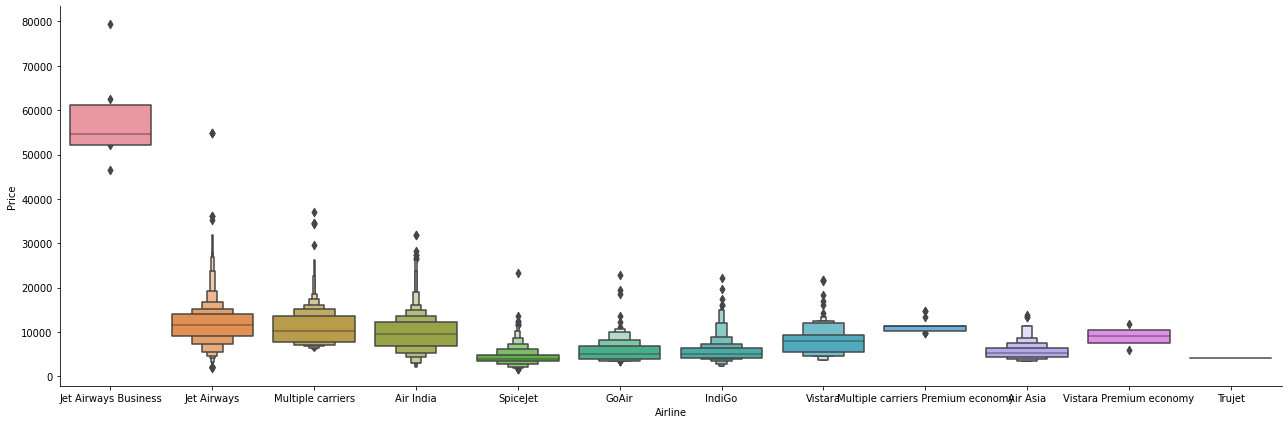

In [22]:
sns.catplot(x='Airline',y='Price',data=train_df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [23]:
Airline = pd.get_dummies(train_df.Airline,drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [24]:
train_df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64

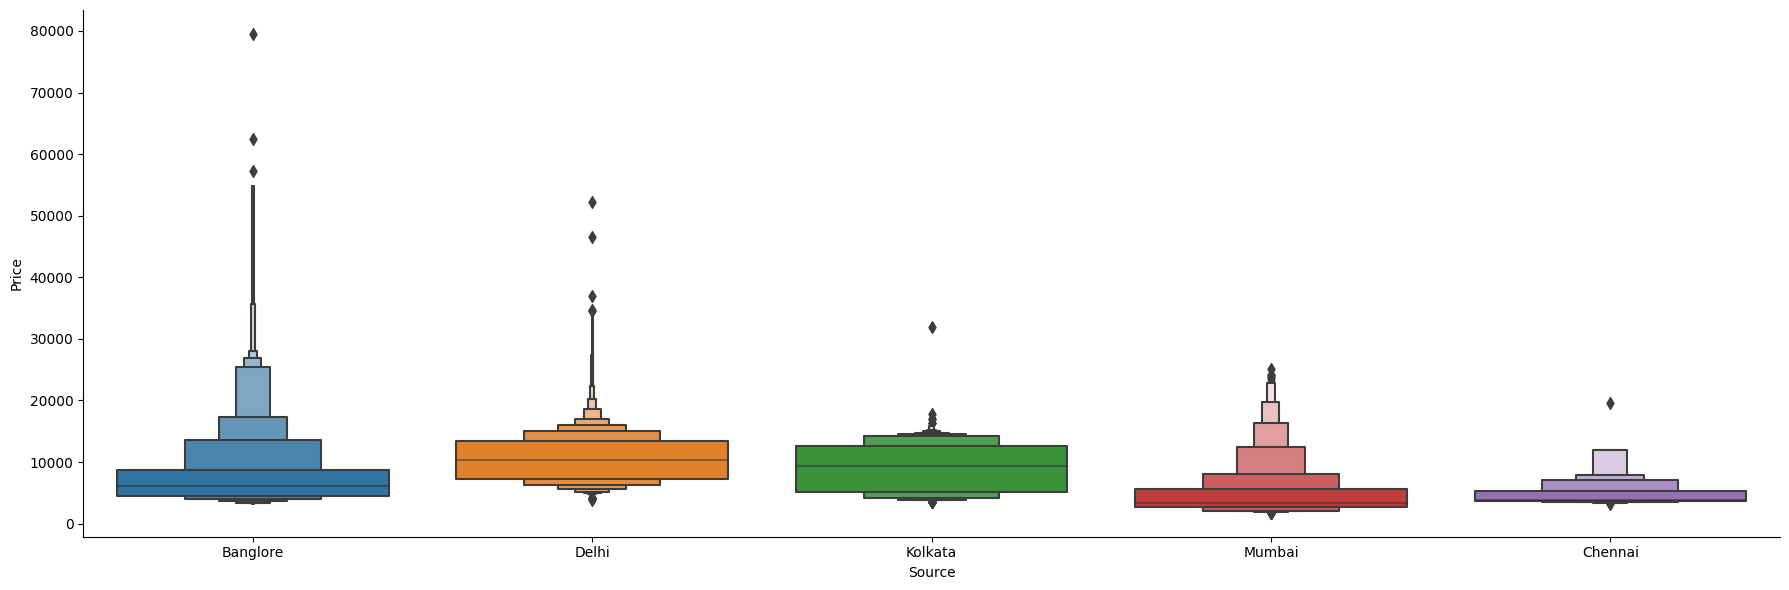

In [25]:
sns.catplot(x='Source',y='Price',data=train_df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [26]:
Source = pd.get_dummies(train_df.Source,drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [27]:
train_df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

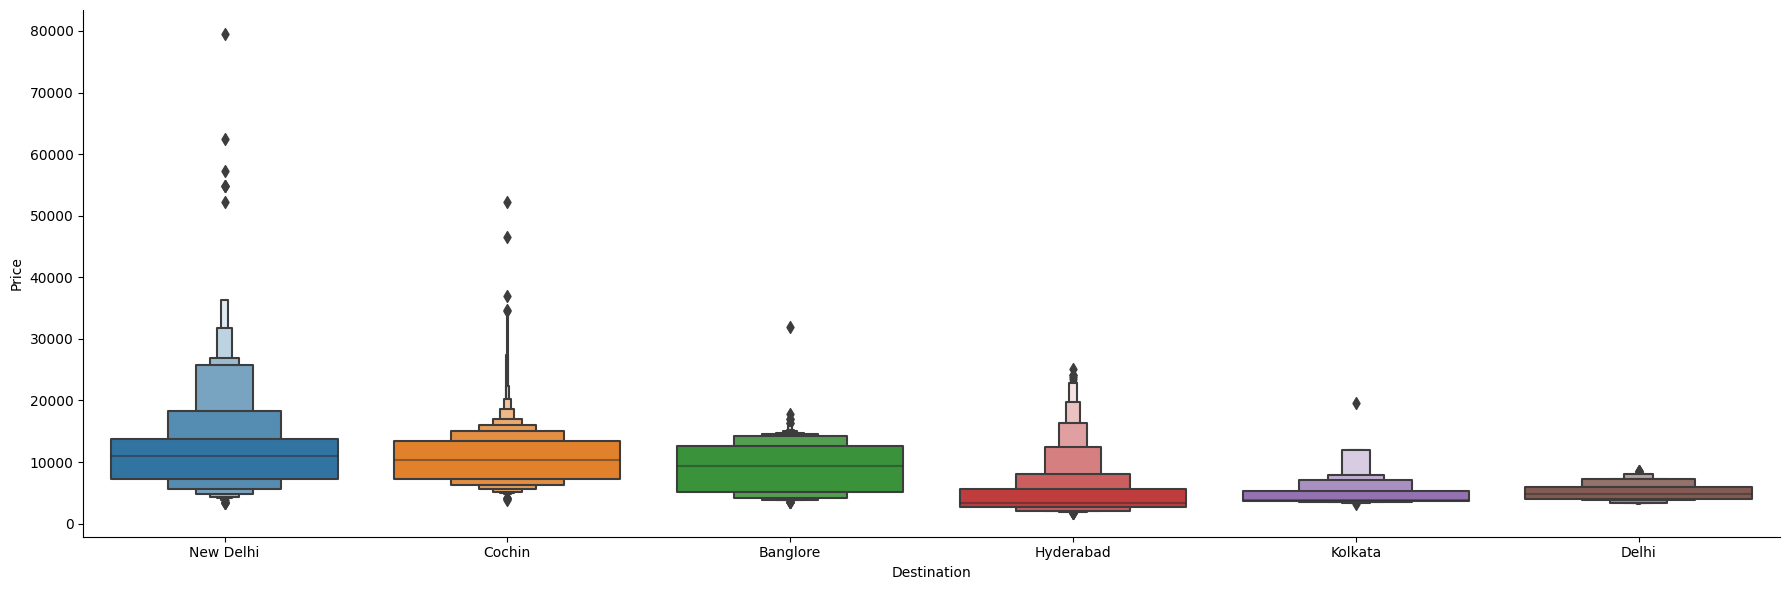

In [28]:
sns.catplot(x='Destination',y='Price',data=train_df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [29]:
Destination = pd.get_dummies(train_df.Destination,drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [30]:
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Duration(Hrs.),Duration(Min.)
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [31]:
train_df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1519
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [32]:
train_df.replace({'non-stop':0, '1 stop':1,'2 stops' :2, '3 stops':3,'4 stops':4},inplace=True)
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Duration(Hrs.),Duration(Min.)
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,2019,16,50,21,35,4,45


In [33]:
train_df.Additional_Info.value_counts()

No info                         8343
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [34]:
train_df.drop(['Airline','Source','Destination','Route','Additional_Info'],axis=1,inplace=True)
train_df.head()

,Total_Stops,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Duration(Hrs.),Duration(Min.)
0,0,3897,24,3,2019,22,20,1,10,2,50
1,2,7662,1,5,2019,5,50,13,15,7,25
2,2,13882,9,6,2019,9,25,4,25,19,0
3,1,6218,12,5,2019,18,5,23,30,5,25
4,1,13302,1,3,2019,16,50,21,35,4,45


In [35]:
train_final_df = pd.concat([train_df,Source,Airline,Destination],axis=1)
train_final_df.head()

,Total_Stops,Price,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Duration(Hrs.),Duration(Min.),Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,2019,22,20,1,10,2,50,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,5,50,13,15,7,25,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,13882,9,6,2019,9,25,4,25,19,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,1,6218,12,5,2019,18,5,23,30,5,25,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,13302,1,3,2019,16,50,21,35,4,45,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [36]:
train_final_df.shape

(10681, 31)

# Test_Data

In [37]:
test_df = pd.read_csv('Test_Data.csv')
pd.set_option('display.max_columns',None)
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [38]:
test_df.isnull().sum()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


## EDA

In [39]:
test_df['Journey_Date'] = pd.to_datetime(test_df.Date_of_Journey,format="%d/%m/%Y").dt.day
test_df['Journey_Month'] = pd.to_datetime(test_df.Date_of_Journey,format="%d/%m/%Y").dt.month 
test_df['Journey_Year'] = pd.to_datetime(test_df.Date_of_Journey,format="%d/%m/%Y").dt.year 

test_df['Dep_Hour'] = pd.to_datetime(test_df['Dep_Time']).dt.hour
test_df['Dep_Minutes'] = pd.to_datetime(test_df['Dep_Time']).dt.minute

test_df['Arrival_Hour']    = pd.to_datetime(test_df['Arrival_Time']).dt.hour
test_df['Arrival_Minutes'] = pd.to_datetime(test_df['Arrival_Time']).dt.minute

In [40]:
test_df = test_df.drop(columns={'Date_of_Journey','Dep_Time','Arrival_Time'})
test_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,2019,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,2019,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,2019,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,2019,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,2019,23,55,2,45


In [41]:
test_df[test_df['Duration']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes
2660,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,12,3,2019,16,50,16,55


In [42]:
test_df.drop(2660,inplace=True)

In [43]:
test_df['Duration(Hrs.)'] =  test_df['Duration'].apply(lambda x: int(x.split('h')[0]))

test_df['Duration(Min.)'] =  test_df['Duration'].apply(lambda x: int(x.split('h')[1].split('m')[0]) if (x.split('h')[1]!='') else 0)

In [44]:
test_df.drop('Duration',axis=1,inplace = True)

In [45]:
Airline = pd.get_dummies(test_df.Airline,drop_first=True)

Source = pd.get_dummies(test_df.Source,drop_first=True)

Destination = pd.get_dummies(test_df.Destination,drop_first=True)

test_df.replace({'non-stop':0, '1 stop':1,'2 stops' :2, '3 stops':3,'4 stops':4},inplace=True)

test_df.drop(['Airline','Source','Destination','Route','Additional_Info'],axis=1,inplace=True)


In [46]:
test_final_df = pd.concat([test_df,Source,Airline,Destination],axis=1)
test_final_df.head()

,Total_Stops,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Duration(Hrs.),Duration(Min.),Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,2019,17,30,4,25,10,55,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,12,5,2019,6,20,10,20,4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,21,5,2019,19,15,19,0,23,45,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,1,21,5,2019,8,0,21,0,13,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0,24,6,2019,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [47]:
test_final_df.shape

(2670, 29)

# Feature Selection

In [48]:
X = train_final_df.drop('Price',axis=1)
X.head()

,Total_Stops,Journey_Date,Journey_Month,Journey_Year,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Duration(Hrs.),Duration(Min.),Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,3,2019,22,20,1,10,2,50,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,2019,5,50,13,15,7,25,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,9,6,2019,9,25,4,25,19,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,1,12,5,2019,18,5,23,30,5,25,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,3,2019,16,50,21,35,4,45,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [49]:
Y = train_final_df.Price
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

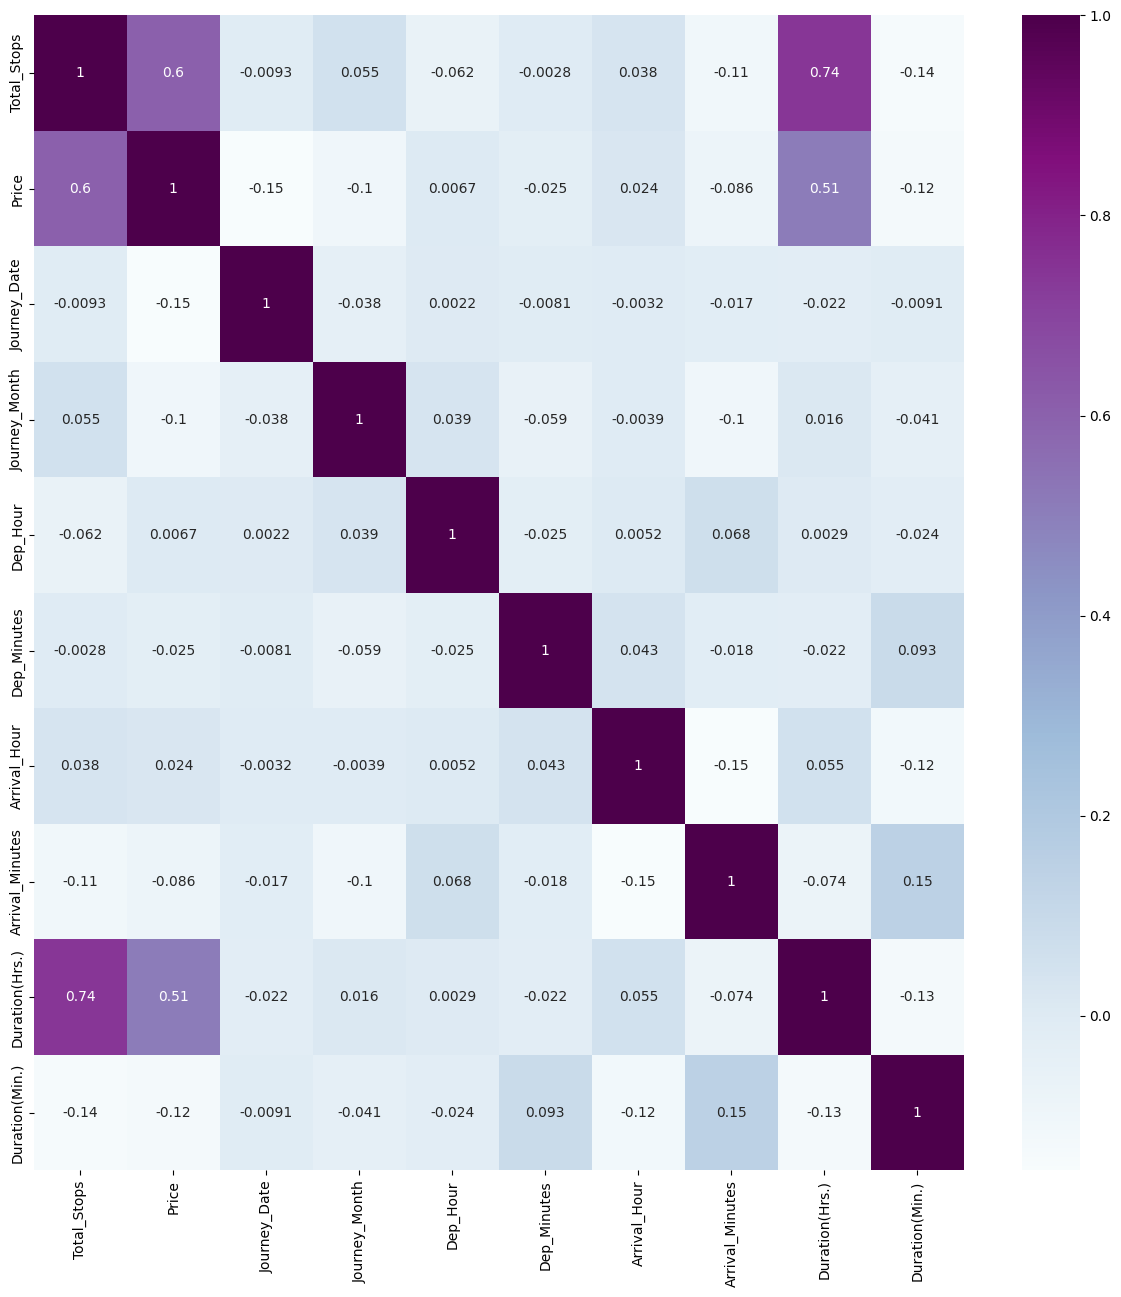

In [50]:
#Finding correlation bw independent and dependent features
#If 2 features are highly correlated with above 80% match, then we can drop one of the features.

train_vis_df = train_df.drop('Journey_Year',axis=1)
plt.figure(figsize=(15,15))
sns.heatmap(train_vis_df.corr(),annot=True,cmap = "BuPu")
plt.show()

In [51]:
#Important features using ExtraTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,Y)

ExtraTreesRegressor()

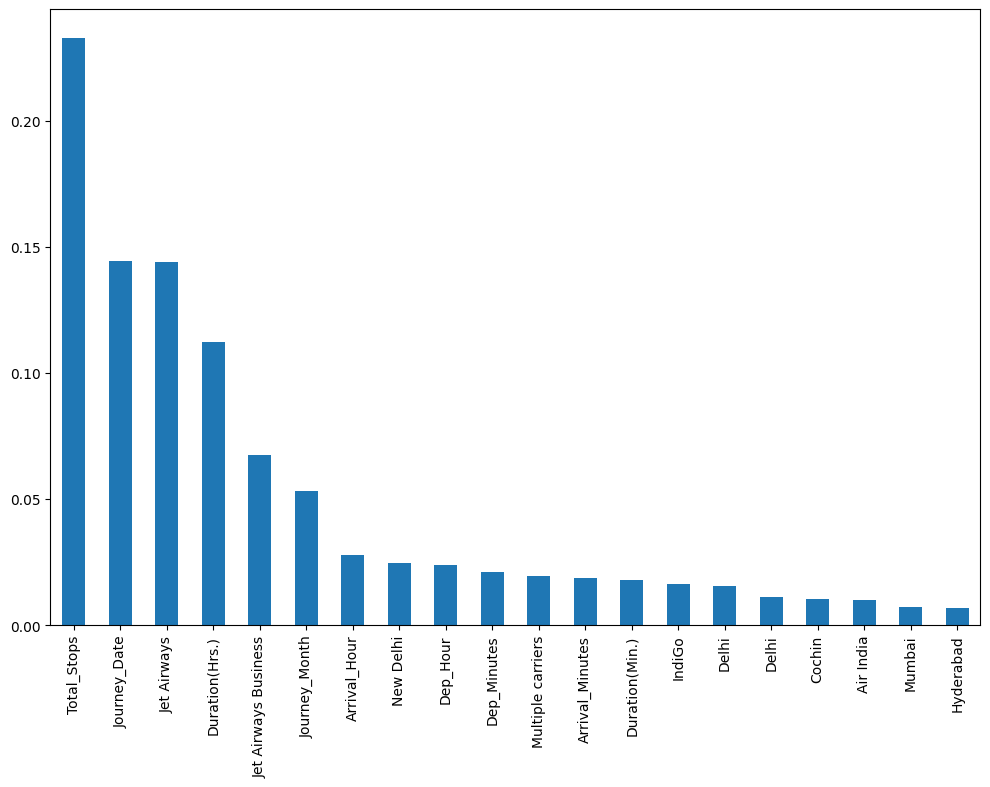

In [52]:
#Plot the graph of 20 important features

plt.figure(figsize=(12,8))
imp_features = pd.Series(selection.feature_importances_,index=X.columns)
imp_features.nlargest(20).plot(kind='bar')
plt.show()

In [53]:
ext=pd.DataFrame(selection.feature_importances_,columns=["extratrees"])
ext
ext.sort_values(['extratrees'],ascending=False)

,extratrees
0,0.232724
1,0.144298
17,0.144112
8,0.112265
18,0.067658
2,0.053074
6,0.027663
29,0.024836
4,0.023761
5,0.021276


In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 10)

In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_test,Y_test)

0.5614215080752235

In [56]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train,Y_train)
logr.score(X_test,Y_test)

/home/anup/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.0627047262517548

In [57]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,Y_train)
lasso.score(X_test,Y_test)

0.5611868287926034

In [58]:
from sklearn.tree import DecisionTreeRegressor
dt =  DecisionTreeRegressor()
dt.fit(X_train,Y_train)
dt.score(X_test,Y_test)

0.7028564426307846

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
rf.score(X_test,Y_test)

0.7878233571643773

In [60]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train,Y_train)
sv.score(X_test,Y_test)

0.023865231633130556

In [61]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=10)

cross_val_score(LinearRegression(),X,Y,cv=cv)

array([0.56142151, 0.56286802, 0.6288264 , 0.59371223, 0.60366335])

In [62]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import Lasso
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestClassifier
# from sklearn import svm

# def best_model(X,Y):
#     algos = {
               
#         'Linear Regression' :{
#             'model' : LinearRegression(),
#             'params': {
#               'normalize' : [True,False]
#             }
#         },
        
#          'Logistic Regression' : {
#             'model' : LogisticRegression(solver='liblinear',multi_class='auto'),
#             'params' : {
#                 'C' : [1,10,20],
#                       }
#             },

        
#         'Lasso' : {
#             'model' : Lasso(),
#             'params': {
#                 'alpha' : [1,2],
#                 'selection' : ['random','cyclic']
#             } 
#         },
        

       
#             'Decision Tree' : {
#                 'model' : DecisionTreeRegressor(),
#                 'params':{
#                     'criterion' : ['mse','friedman_mse'],
#                     'splitter'  : ['best','random']
#                 }
#             },
        
          
#         'Random Forest' : {
#             'model' : RandomForestClassifier(),
#             'params' : {
#                 'n_estimators' : [1,5,10]     
#                        }
#              },
        
#          'SVM' : {
#         'model' : svm.SVC(gamma='auto'),
#         'params' : {
#             'C' : [1,10,20],
#             'kernel' : ['rbf','linear']
#                   }
#             }
    
#        }
    
#     scores = []
#     cv = ShuffleSplit(n_splits=5,test_size=0.2)
#     for algo_name, mp in algos.items():
#         gs = GridSearchCV(mp['model'],mp['params'],cv=cv,return_train_score = False)
#         gs.fit(X,Y)
#         scores.append({
#             'Model' : algo_name,
#             'Best Score' : gs.best_score_,
#             'Best Params' : gs.best_params_
#         })
#     return pd.DataFrame(scores,columns=['Model','Best Score','Best Params'])

# best_model(X,Y)

In [63]:
Y_pred = rf.predict(X_test)
len(Y_pred)

2137

/home/anup/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


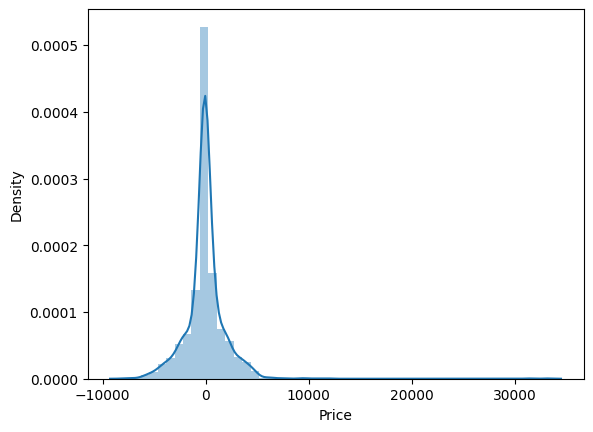

In [64]:
sns.distplot(Y_test-Y_pred)
plt.show()

Text(0, 0.5, 'Actual Values')

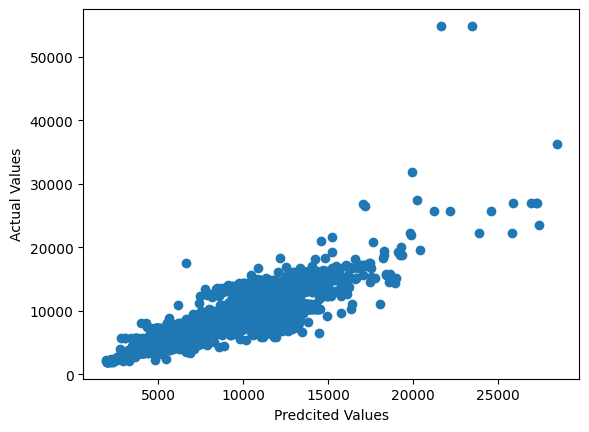

In [65]:
plt.scatter(Y_pred,Y_test)
plt.xlabel('Predcited Values')
plt.ylabel('Actual Values')

### HyperParameter Tuning

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
n_estimators      = [int(x) for x in np.linspace(start=100,stop=1500,num=15)]
max_features      = ['auto','sqrt']
max_depth         = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf  = [1,2,5,10]

In [68]:
#Creating Random Grid

random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth'    : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf'  : min_samples_leaf}

In [69]:
# Random Search using 5 fold cross validation across 10 diff combinations

random_search = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,cv=5,n_iter = 10,random_state=40)

In [70]:
random_search.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   random_state=40)

In [71]:
random_search.best_params_

{'n_estimators': 1100,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [72]:
random_search.best_score_

0.8245004883691038

In [73]:
pred = random_search.predict(X_test)

/home/anup/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


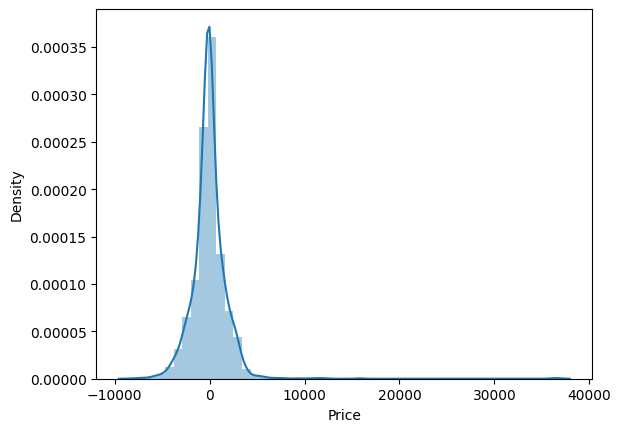

In [74]:
sns.distplot(Y_test-pred)
plt.show()

In [75]:
import pickle
with open('Flight Fare Prediction.pickle','wb') as f:
    pickle.dump(random_search,f)

In [76]:
final = open('Flight Fare Prediction.pickle','rb')
model = pickle.load(final)

In [77]:
Y_prediction = model.predict(X_test)

In [78]:
from sklearn import metrics
metrics.r2_score(Y_test,Y_prediction)

0.793613114700949